# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.4.1


## Creating data to view and fit

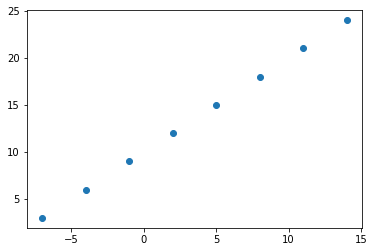

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Inpur and output shapes

In [4]:
# Create a demo tensor of our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],y[0]

(-7.0, 3.0)

In [6]:
X[1],y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0],y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

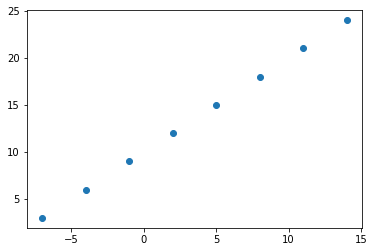

In [12]:
plt.scatter(X,y);

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells out model how wronf it is) and the optimizer (tells our model how to improve the patterns it is learning) and evalution metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 367ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [16]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we ,ight add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 417ms/step - loss: 14.3099 - mae: 14.3099
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.8705 - mae: 13.8705
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.4605 - mae: 13.4605
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 13.0821 - mae: 13.0821
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 12.7203 - mae: 12.7203
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 12.3467 - mae: 12.3467
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9567 - mae: 11.9567
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 11.5246 - mae: 11.5246
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0368 - mae: 11.0368
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4346 - mae: 10.4346
Epoch 11/100
1/1 [==============================] - 0s 4

In [18]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model prediction has improved..
model.predict([17.0])

array([[32.986168]], dtype=float32)

In [20]:
# Let's see if we can make another to improve our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50,activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 336ms/step - loss: 13.3252 - mae: 13.3252
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.6189 - mae: 12.6189
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.9164 - mae: 11.9164
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2153 - mae: 11.2153
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5129 - mae: 10.5129
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.8064 - mae: 9.8064
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0930 - mae: 9.0930
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.3699 - mae: 8.3699
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.6340 - mae: 7.6340
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8821 - mae: 6.8821
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - l

In [21]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
model.predict([17.0])

array([[27.324867]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> evaluate it...
```


When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data = what data are we working with? What  does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how ado the predictions of a model line up against the ground truth (the original labes)?

In [23]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels fot the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

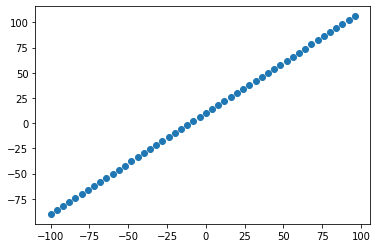

In [27]:
# Visualize the data 
import matplotlib.pyplot as plt

plt.scatter(X,y);